<a href="https://colab.research.google.com/github/mcmejiag14/Deep-Learning/blob/main/Code_CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import tensorflow as tf 
from tensorflow.keras import layers 
from tensorflow.keras.callbacks import EarlyStopping 
import pathlib 
import matplotlib.pyplot as plt 

data_dir = '/content/drive/MyDrive/Data 2' 
data_dir = pathlib.Path(data_dir) 



In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir, 
    validation_split=0.1, 
    subset="training",  
    seed=123, image_size=(256, 256), 
    batch_size=128) 
#
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir, 
     validation_split=0.2, 
     subset="validation", 
     seed=123, 
     image_size=(256, 256), 
     batch_size=128) 
 
class_names = train_ds.class_names
print(class_names)

Found 18 files belonging to 4 classes.
Using 17 files for training.
Found 18 files belonging to 4 classes.
Using 3 files for validation.
['Control', 'Tat + cART', 'Tat 10', 'cART']


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
AUTOTUNE = tf.data.experimental.AUTOTUNE 
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE) 
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE) 

model = tf.keras. Sequential([ 
    layers.experimental.preprocessing. Rescaling(1./255), 
    layers.Conv2D(32, 3, padding='same', activation='relu'), 
    layers.MaxPooling2D(), 
    #layers.Dropout (0.2),

  
    layers.Conv2D(16, 3, padding='same', activation='relu'), 
    layers.MaxPooling2D(), 
    layers.Dropout(0.1),
 
    layers.Flatten (), layers. Dense(128, activation='relu'), 
    layers.Dense (64, activation='relu'), 
    layers.Dense(16, activation='relu'),

    layers.Dense(4) # number of classes
    ]) 


Epoch 1/200
1/1 [==============================] - 16s 16s/step - loss: 1.3907 - accuracy: 0.2353 - val_loss: 1.3457 - val_accuracy: 0.3333
Epoch 2/200
1/1 [==============================] - 0s 72ms/step - loss: 1.3332 - accuracy: 0.2941 - val_loss: 1.2418 - val_accuracy: 0.3333
Epoch 3/200
1/1 [==============================] - 0s 65ms/step - loss: 1.1182 - accuracy: 0.5882 - val_loss: 1.1784 - val_accuracy: 0.3333
Epoch 4/200
1/1 [==============================] - 0s 62ms/step - loss: 0.8287 - accuracy: 0.5882 - val_loss: 1.4085 - val_accuracy: 0.3333
Epoch 5/200
1/1 [==============================] - 0s 68ms/step - loss: 0.6604 - accuracy: 0.7059 - val_loss: 1.4089 - val_accuracy: 0.3333
Epoch 6/200
1/1 [==============================] - 0s 65ms/step - loss: 0.5290 - accuracy: 0.7647 - val_loss: 1.6267 - val_accuracy: 0.3333
Epoch 7/200
1/1 [==============================] - 0s 56ms/step - loss: 0.4847 - accuracy: 0.7647 - val_loss: 1.2038 - val_accuracy: 0.3333
Epoch 8/200
1/1 [===

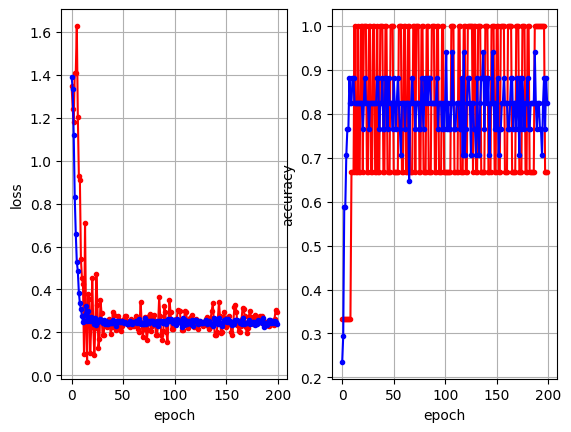

In [6]:
#callbacks = [EarlyStopping (monitor='val_accuracy', patience=3)]  

#model.compile(optimizer='adam',
  #            loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

model.compile (optimizer='adam', loss=tf.losses. SparseCategoricalCrossentropy (from_logits=True), metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds, epochs=200) 

#train_ds = train_ds.map(lambda x, y: (x, tf.cast(y, tf.int32)))
#val_ds = val_ds.map(lambda x, y: (x, tf.cast(y, tf.int32)))

#callbacks = [EarlyStopping(monitor='val_accuracy', patience=3)]
#model.compile (optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
#history = model.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=callbacks)

y_vloss = history.history['val_loss'] 
y_loss = history.history['loss'] 
y_acc = history.history['accuracy'] 
y_vacc = history.history['val_accuracy'] 

fig, (ax1, ax2) = plt.subplots (1, 2) 
ax1.plot(np.arange (len (y_vloss)), y_vloss, marker='.', c='red') 
ax1.plot(np.arange (len (y_loss)), y_loss, marker='.', c='blue') 
ax1.grid() 
plt.setp(ax1, xlabel='epoch', ylabel='loss')

ax2.plot(np.arange (len (y_vacc)), y_vacc, marker='.', c='red') 
ax2.plot(np.arange (len (y_acc)), y_acc, marker='.', c='blue') 
ax2.grid() 
plt.setp(ax2, xlabel='epoch', ylabel='accuracy') 

plt.show()